In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('example.xlsx')

# Create an empty graph
G = nx.DiGraph()

# Create an empty graph 
G.clear()

# Add nodes from DataFrame
for index, row in df.iterrows():
    node_id = row['person_id']
    node_attributes = row.drop('person_id').to_dict()
    G.add_node(node_id, **node_attributes)



# Define the ___ dictionary (code, name)


# Add nodes with attributes (person ID, ...)
# Still need to add attributes
# G.add_node('A', gender='female', age=40, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')
# G.add_node('B', gender='female', age=28, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='A')
# G.add_node('C', gender='male', age=45, employee_class='', employee_type='', job_family='', position_title='', bu='corporate', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')
# G.add_node('D', gender='male', age=38, employee_class='', employee_type='', job_family='', position_title='', bu='TEK', division='', subdivision='', department='', tenure='',critical_core='', job_level='', supervisor_id='')

In [2]:
print(G.nodes(data=True))

[('A', {'gender': 'female', 'age': 40, 'employee_class': 'c_a', 'employee_type': 't_a', 'job_family': 'j_a', 'position_title': 'p_a', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_a', 'department': 'dp_a', 'tenure': 't_a', 'critical_core': 'c_a', 'job_level': 'jl_a', 'supervisor_id': nan}), ('B', {'gender': 'male', 'age': 28, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_family': 'j_a', 'position_title': 'p_b', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_a', 'department': 'dp_a', 'tenure': 't_b', 'critical_core': 'c_b', 'job_level': 'jl_b', 'supervisor_id': 'A'}), ('C', {'gender': 'female', 'age': 35, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_family': 'j_a', 'position_title': 'p_c', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_b', 'department': 'dp_a', 'tenure': 't_c', 'critical_core': 'c_b', 'job_level': 'jl_b', 'supervisor_id': nan}), ('D', {'gender': 'male', 'age': 38, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_famil

In [3]:
def add_bidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)
    # Add the relationship from node2 to node1
    add_relationship(G, node2, node1, relationship)

def add_unidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)

def add_relationship(G, node1, node2, relationship):
    if G.has_edge(node1, node2):
        # Get the current relationship of the edge
        current_relationship = G[node1][node2].get('relationship', [])
        if isinstance(current_relationship, list):
            current_relationship.append(relationship)
        else:
            current_relationship = [current_relationship, relationship]
    else:
        current_relationship = [relationship]
        G.add_edge(node1, node2)

    # Set the new relationship to the edge
    G[node1][node2]['relationship'] = current_relationship

In [4]:
import pandas as pd

# Add 'same_department' edge if 'department' is the same
nodes = list(G.nodes(data=True))  # Create a copy of the node list
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        node1, data1 = nodes[i]
        node2, data2 = nodes[j]
        if data1.get('department') == data2.get('department'):
            add_bidirectional_relationship(G, node1, node2, 'same_department')

# Add 'is_manager' relationship if 'supervisorid' is not None and not 'nan'
nodes = list(G.nodes(data=True))  # Create a copy of the node list
for node, data in nodes:
    supervisorid = data.get('supervisor_id')
    if supervisorid and supervisorid is not None and not pd.isnull(supervisorid):
        add_unidirectional_relationship(G, supervisorid, node, 'is_manager')

# Print the edges with their attributes
print(G.edges(data=True))

[('A', 'B', {'relationship': ['same_department', 'is_manager']}), ('A', 'C', {'relationship': ['same_department']}), ('A', 'D', {'relationship': ['same_department']}), ('B', 'A', {'relationship': ['same_department']}), ('B', 'C', {'relationship': ['same_department']}), ('B', 'D', {'relationship': ['same_department']}), ('C', 'A', {'relationship': ['same_department']}), ('C', 'B', {'relationship': ['same_department']}), ('C', 'D', {'relationship': ['same_department']}), ('D', 'A', {'relationship': ['same_department']}), ('D', 'B', {'relationship': ['same_department']}), ('D', 'C', {'relationship': ['same_department']}), ('E', 'F', {'relationship': ['same_department']}), ('E', 'G', {'relationship': ['same_department', 'is_manager']}), ('E', 'H', {'relationship': ['same_department']}), ('F', 'E', {'relationship': ['same_department']}), ('F', 'G', {'relationship': ['same_department']}), ('F', 'H', {'relationship': ['same_department']}), ('G', 'E', {'relationship': ['same_department']}), ('

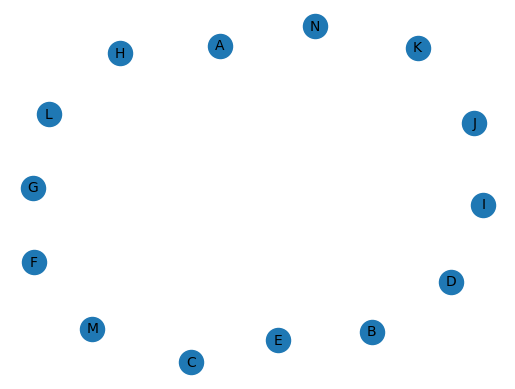

In [5]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G, k=500)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

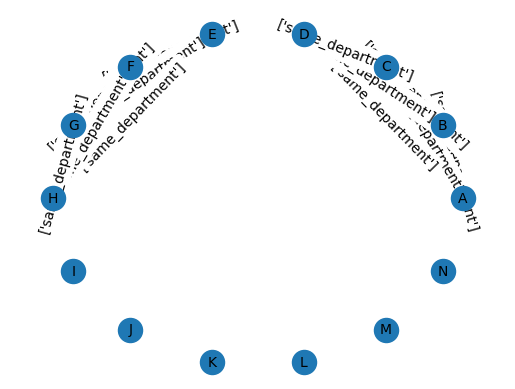

In [6]:
# Draw the graph
pos = nx.circular_layout(G, scale = 1000)  # positions for all nodes

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'same_department' in d['relationship']]

# Draw all nodes, not just those with 'same_department' edges
nx.draw_networkx_nodes(G, pos, node_size=300)

# Only draw edges and labels if there are 'same_department' edges
if edges:
    nx.draw_networkx_edges(G, pos, edgelist=edges)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    # edge labels
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    edge_labels = {k: [rel for rel in v if rel == 'same_department'] for k, v in edge_labels.items() if k in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

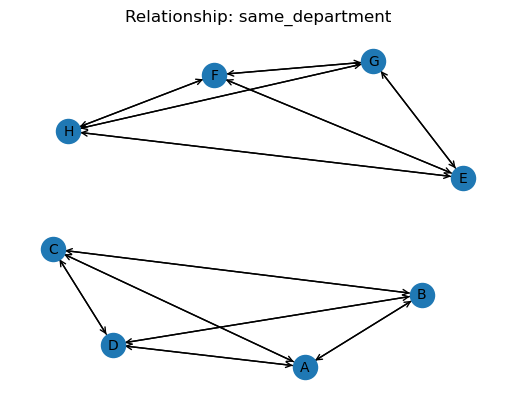

In [7]:
relationship = "same_department"  # specify the relationship you want to display

# Create a new graph that only contains edges with the specified relationship
G_rel = nx.DiGraph((u, v, d) for u, v, d in G.edges(data=True) if relationship in d['relationship'])

# Draw the graph
pos = nx.spring_layout(G_rel, k=5)  # positions for all nodes

# edges
edges = G_rel.edges()

# nodes
nodes = G_rel.nodes()
nx.draw_networkx_nodes(G_rel, pos, nodelist=nodes, node_size=300)

# Only draw edges and labels if there are 'same_department' edges
if edges:
    nx.draw_networkx_edges(G_rel, pos, edgelist=edges, arrowstyle='->')

    # labels
    nx.draw_networkx_labels(G_rel, pos, font_size=10, font_family='sans-serif')

plt.title(f"Relationship: {relationship}")
plt.axis('off')
plt.show()

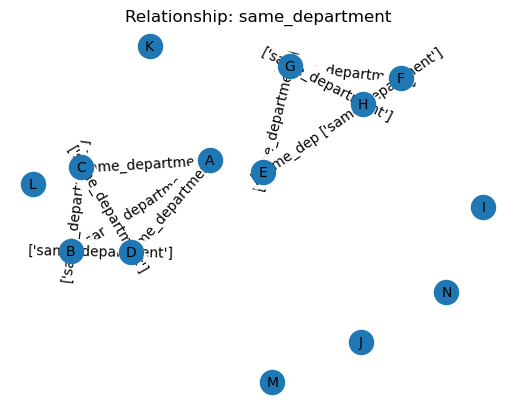

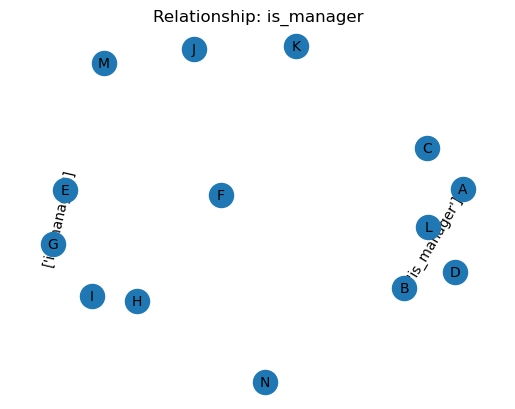

In [8]:
# Get all unique relationships in the graph
relationships = set()
for u, v, d in G.edges(data=True):
    relationships.update(d['relationship'])
relationships_to_display = list(relationships)

for relationship in relationships_to_display:
    # Draw the graph
    pos = nx.spring_layout(G, k=1.25)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=300)

    # edges
    edges = [(u, v) for u, v, d in G.edges(data=True) if relationship in d['relationship']]
    nx.draw_networkx_edges(G, pos, edgelist=edges)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    # edge labels
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    edge_labels = {k: [rel for rel in v if rel == relationship] for k, v in edge_labels.items() if k in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Relationship: {relationship}")
    plt.axis('off')
    plt.show()

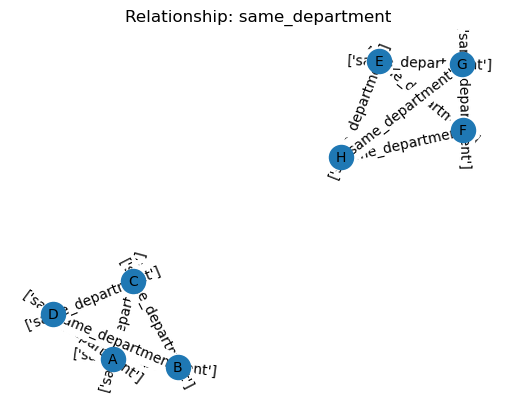

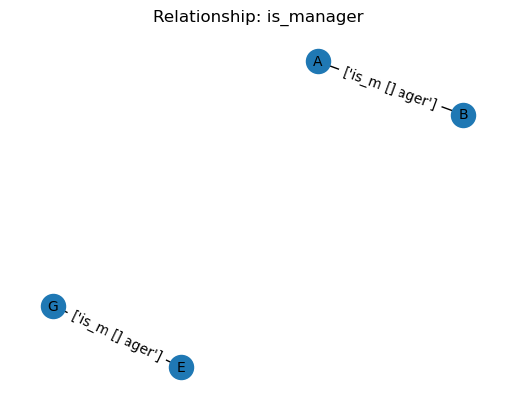

In [81]:
# for relationship in relationships_to_display:
#     # Create a new graph that only contains edges with the specified relationship
#     G_rel = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if relationship in d['relationship'])

#     # Draw the graph
#     pos = nx.spring_layout(G_rel, k=1)  # positions for all nodes

#     # edges
#     edges = G_rel.edges()

#     # nodes
#     nodes = G_rel.nodes()
#     nx.draw_networkx_nodes(G_rel, pos, nodelist=nodes, node_size=300)

#     # Only draw edges and labels if there are 'same_department' edges
#     if edges:
#         nx.draw_networkx_edges(G_rel, pos, edgelist=edges)

#         # labels
#         nx.draw_networkx_labels(G_rel, pos, font_size=10, font_family='sans-serif')

#         # edge labels
#         edge_labels = nx.get_edge_attributes(G, 'relationship')
#         edge_labels = {k: [rel for rel in v if rel == relationship] for k, v in edge_labels.items() if k in edges}
#         nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#     plt.title(f"Relationship: {relationship}")
#     plt.axis('off')
#     plt.show()

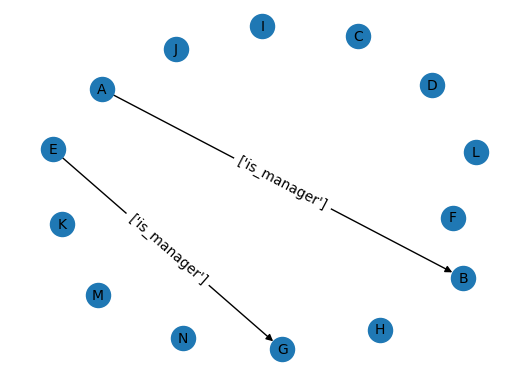

In [9]:
# Show the is_manager relationship 

# Draw the graph
pos = nx.spring_layout(G, k=10)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'is_manager' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
edge_labels = {k: [rel for rel in v if rel == 'is_manager'] for k, v in edge_labels.items() if k in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

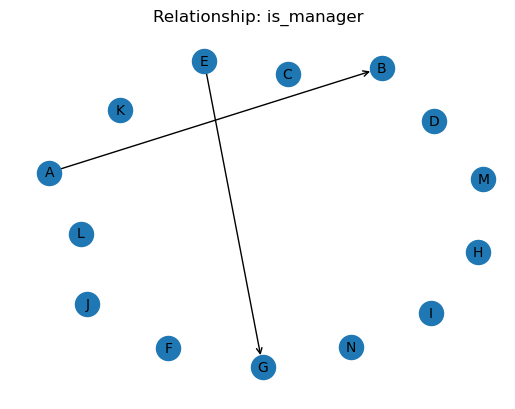

In [10]:
# Show the is_manager relationship 

# Draw the graph
pos = nx.spring_layout(G, k=5)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'is_manager' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->')

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Relationship: is_manager")  # add title
plt.axis('off')
plt.show()

In [11]:
# print the nodes with their attributes
print(G.nodes(data=True))

# Print the nodes with their BU attribute
for node, data in G.nodes(data=True):
    print(f"Node: {node}, BU: {data.get('bu')}, Supervisor ID: {data.get('supervisor_id')}")

[('A', {'gender': 'female', 'age': 40, 'employee_class': 'c_a', 'employee_type': 't_a', 'job_family': 'j_a', 'position_title': 'p_a', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_a', 'department': 'dp_a', 'tenure': 't_a', 'critical_core': 'c_a', 'job_level': 'jl_a', 'supervisor_id': nan}), ('B', {'gender': 'male', 'age': 28, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_family': 'j_a', 'position_title': 'p_b', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_a', 'department': 'dp_a', 'tenure': 't_b', 'critical_core': 'c_b', 'job_level': 'jl_b', 'supervisor_id': 'A'}), ('C', {'gender': 'female', 'age': 35, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_family': 'j_a', 'position_title': 'p_c', 'bu': 'corporate', 'division': 'd_a', 'subdivision': 'sd_b', 'department': 'dp_a', 'tenure': 't_c', 'critical_core': 'c_b', 'job_level': 'jl_b', 'supervisor_id': nan}), ('D', {'gender': 'male', 'age': 38, 'employee_class': 'c_b', 'employee_type': 't_b', 'job_famil

In [12]:
import numpy as np
np.mean([d for _, d in G.degree()])


3.4285714285714284

In [14]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths

{'A': {'A': 0, 'B': 1, 'C': 1, 'D': 1},
 'B': {'B': 0, 'A': 1, 'C': 1, 'D': 1},
 'C': {'C': 0, 'A': 1, 'B': 1, 'D': 1},
 'D': {'D': 0, 'A': 1, 'B': 1, 'C': 1},
 'E': {'E': 0, 'F': 1, 'G': 1, 'H': 1},
 'F': {'F': 0, 'E': 1, 'G': 1, 'H': 1},
 'G': {'G': 0, 'E': 1, 'F': 1, 'H': 1},
 'H': {'H': 0, 'E': 1, 'F': 1, 'G': 1},
 'I': {'I': 0},
 'J': {'J': 0},
 'K': {'K': 0},
 'L': {'L': 0},
 'M': {'M': 0},
 'N': {'N': 0}}

In [15]:
nx.density(G)

0.13186813186813187

: 